In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startups=pd.read_csv("50_Startups.csv")
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups1=startups.rename({'R&D Spend':'RDS','Marketing Spend':'marketing_spend'},axis=1)

In [5]:
startups1

,RDS,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
startups1[startups1.duplicated()]

,RDS,Administration,marketing_spend,State,Profit


In [7]:
startups1.describe()

,RDS,Administration,marketing_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
startups1.corr()

,RDS,Administration,marketing_spend,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


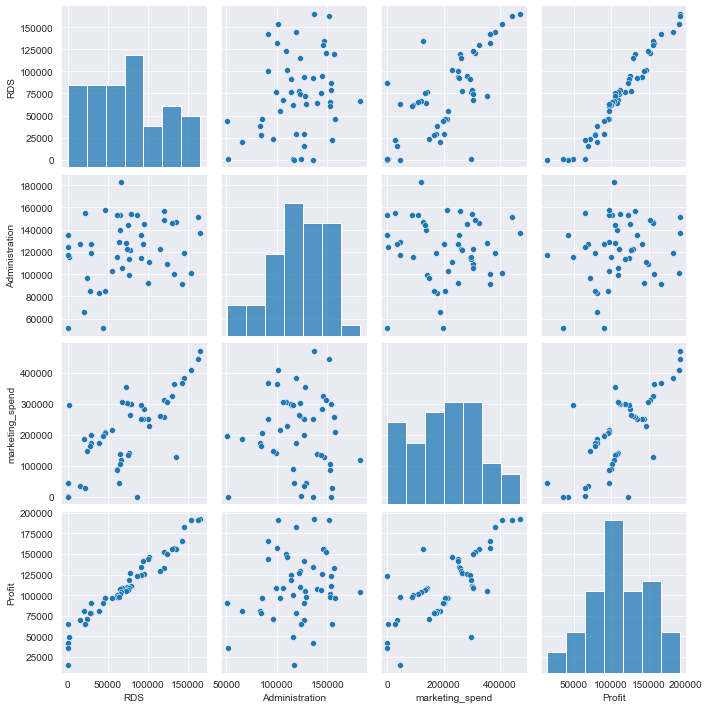

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(startups1)


In [10]:
model=smf.ols('Profit~RDS+Administration+marketing_spend',data=startups1).fit()

In [11]:
model.params

Intercept          50122.192990
RDS                    0.805715
Administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [12]:
model.tvalues, np.round(model.pvalues,4)

(Intercept           7.626218
 RDS                17.846374
 Administration     -0.525507
 marketing_spend     1.655077
 dtype: float64,
 Intercept          0.0000
 RDS                0.0000
 Administration     0.6018
 marketing_spend    0.1047
 dtype: float64)

In [13]:
# finding  r squared values 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        11:47:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#build the SLR and MLR model for administration and marketing_spend, since p value of these columns is greater then 0.05
#then also we need to find the p values and t values for them
#SLR= simple linear regression
#MLR=multi linear regression 

In [14]:
slr_a=smf.ols('Profit~Administration',data=startups1).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [15]:
slr_m=smf.ols('Profit~marketing_spend',data=startups1).fit()
slr_m.tvalues, slr_m.pvalues

(Intercept          7.808356
 marketing_spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 marketing_spend    4.381073e-10
 dtype: float64)

In [16]:
mlr_am=smf.ols('Profit~Administration+marketing_spend',data=startups1).fit()
mlr_am.tvalues, mlr_am.pvalues

(Intercept          1.142741
 Administration     2.467779
 marketing_spend    8.281039
 dtype: float64,
 Intercept          2.589341e-01
 Administration     1.729198e-02
 marketing_spend    9.727245e-11
 dtype: float64)

In [17]:
#COLLINEARITY PROBLEM CHECK 
#calcul ate vif=1/(1-rsquare) for all independent veriables

rsq_r=smf.ols('RDS~Administration+marketing_spend',data=startups1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols('Administration~RDS+marketing_spend',data=startups1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols('marketing_spend~RDS+Administration',data=startups1).fit().rsquared
vif_m=1/(1-rsq_m)

#putting the values in the dataset format
d1={'Veriables':['RDS','Administration','marketing_spend'],'vif':[vif_r, vif_a,vif_m]}
vif_df=pd.DataFrame(d1)
vif_df

,Veriables,vif
0,RDS,2.468903
1,Administration,1.175091
2,marketing_spend,2.326773


In [ ]:
#compair the vif value with 10 or 20
#if vif>20 then it will create collinearity problem
# here vif>20, so there is not collinearity problem.

C:\Users\91840\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


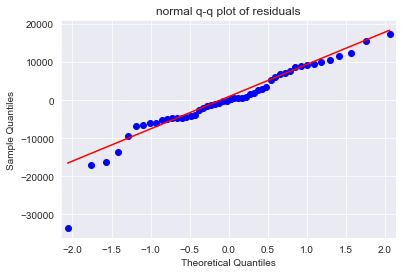

In [18]:
#residual analysis 
# test for normality of residuals(Q-Q plot)

sm.qqplot(model.resid, line='q')
plt.title("normal q-q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [20]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standardized_values (vals):
        return (vals - vals.mean())/vals.std()
    # User defined z = (x - mu)/sigma

Text(0, 0.5, 'standadized residual(errors) values')

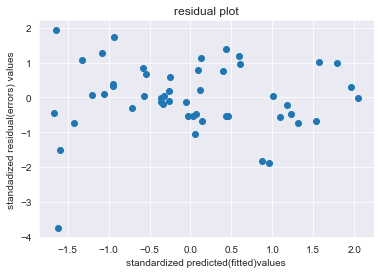

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized predicted(fitted)values")
plt.ylabel("standadized residual(errors) values")

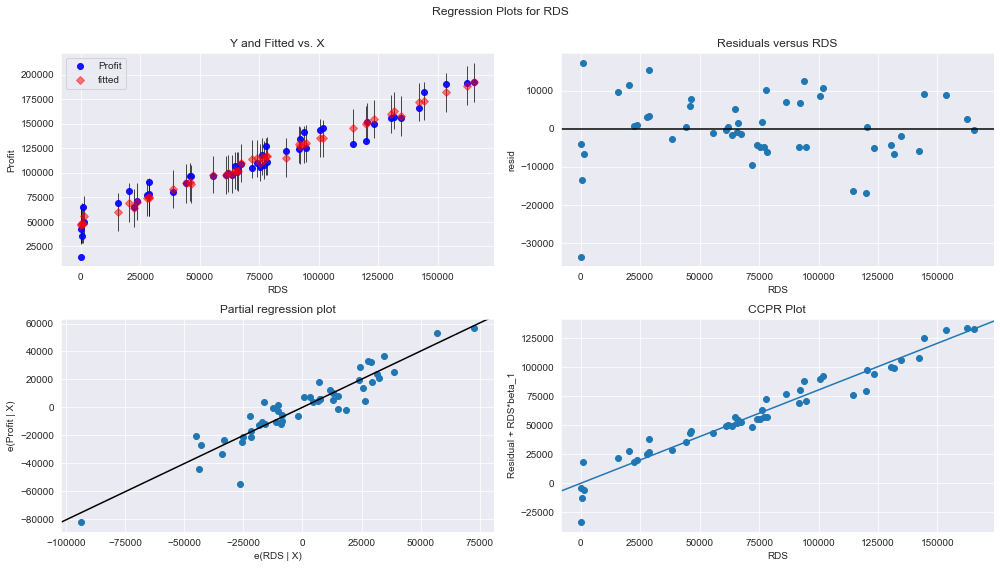

In [22]:
#Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

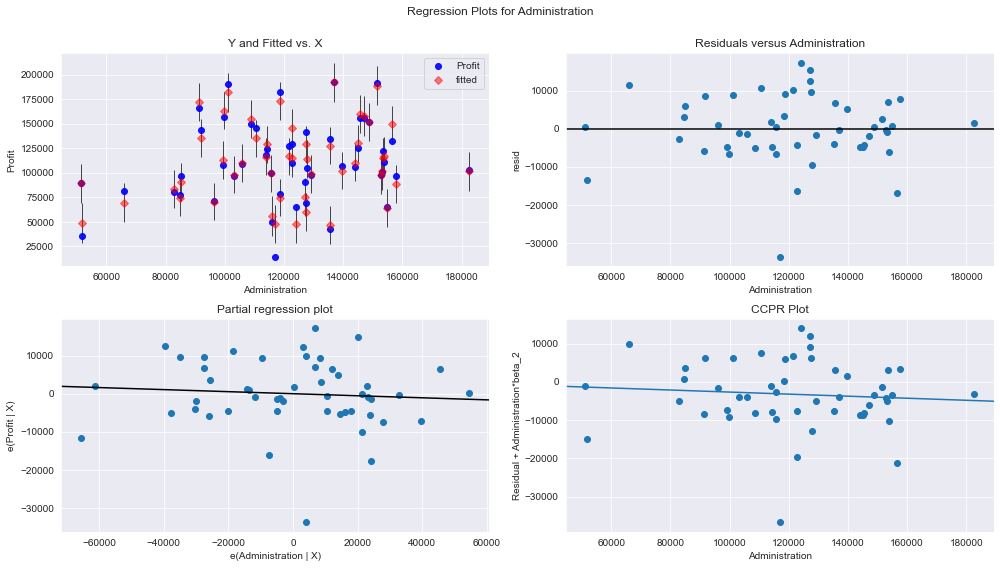

In [23]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

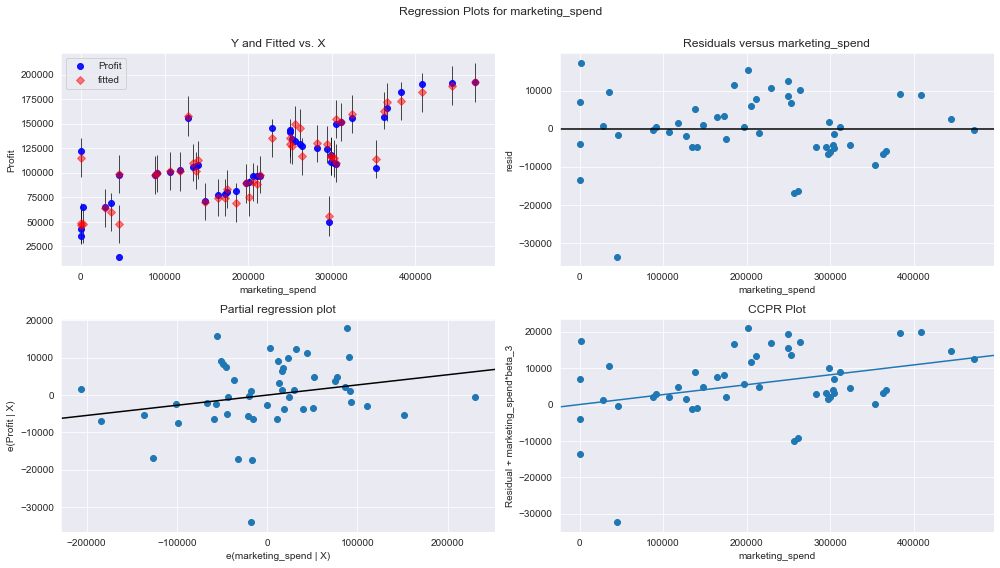

In [24]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'marketing_spend',fig=fig)
plt.show()

In [25]:
#if cooks distance >1 then it said to be an outlier
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

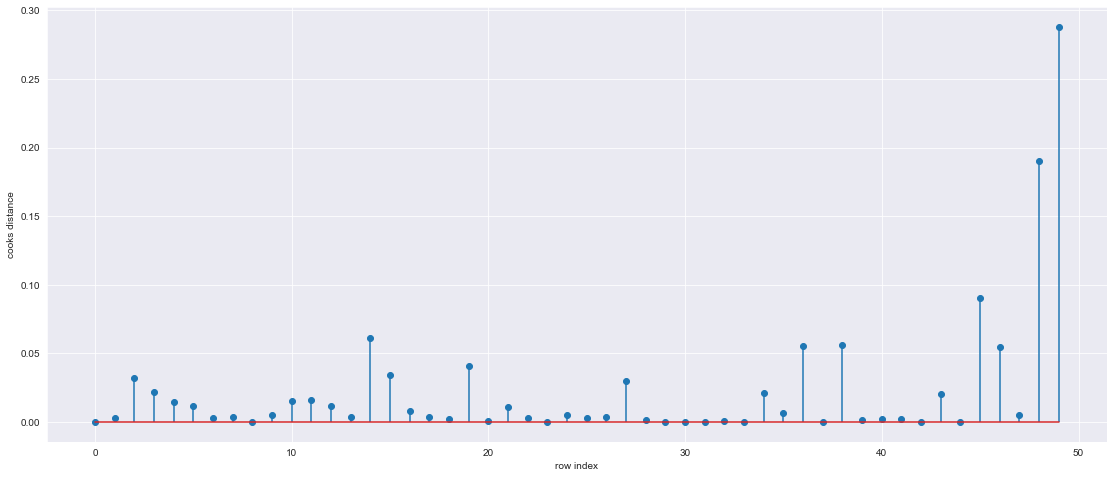

In [26]:
#plot the influencers using the stem plot
fig=plt.figure(figsize=(19,8))
plt.stem(np.arange(len(startups1)),np.round(c,5))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [27]:
# index and value of c should be greater than c> 0.5
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

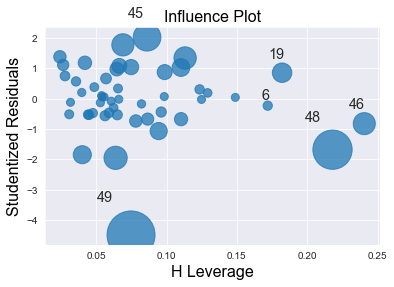

In [29]:
# leverage value using high influence points
# the points which are beyond the cutoff level is called as influencers
influence_plot(model)
plt.show()

In [30]:
#leverage cutof value = 3*(k+1)/n 
# k= no of features/column 
# n= no of datapoints
k=startups1.shape[1]
n=startups1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [33]:
startups1[startups1.index.isin([49])]

# since record no 49 is found to be an outlier

,RDS,Administration,marketing_spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# model improvement 

In [34]:
#improving the model by discarding the influencers from the dataset 
startups2=startups1.drop(startups1.index[[49]],axis=0).reset_index(drop=True)

In [35]:
startups2

,RDS,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
model2=smf.ols("Profit~RDS+Administration+marketing_spend",data=startups2).fit()

In [39]:
model2.rsquared, model2.aic

(0.9613162435129847, 1020.5652974526367)

In [42]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+Administration+marketing_spend",data=startups2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        startups2=startups2.drop(startups2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        startups2
    else:
        final_model=smf.ols("Profit~RDS+Administration+marketing_spend",data=startups2).fit()
        final_model.rsquared , final_model.aic
        print("accurecy of model improved to",final_model.rsquared)

accurecy of model improved to 0.9614129113440602
accurecy of model improved to 0.962593650298269
accurecy of model improved to 0.9638487279209415
accurecy of model improved to 0.9663901957918793
accurecy of model improved to 0.9706076169779905
accurecy of model improved to 0.9727840588916423
accurecy of model improved to 0.9734292907181952
accurecy of model improved to 0.9785801571833451
accurecy of model improved to 0.9777383743090916
accurecy of model improved to 0.9790510088977512
accurecy of model improved to 0.9790004461890552
accurecy of model improved to 0.9807878666153609
accurecy of model improved to 0.9838299343609735
accurecy of model improved to 0.9831149926392769
accurecy of model improved to 0.9833768520972176
accurecy of model improved to 0.9878892536376698
accurecy of model improved to 0.9877191935547199
accurecy of model improved to 0.9858356627471713
accurecy of model improved to 0.9874766829880098
accurecy of model improved to 0.9906666289527223
accurecy of model imp

In [ ]:
#model accurecy improved to 0.9882 is < 0.99
# so we use final model for prediction instead of model2


In [46]:
#insert new values to predict the data
sample_data=pd.DataFrame({'RDS':80000,'Administration':70000,'marketing_spend':100000},index=[0])
sample_data

,RDS,Administration,marketing_spend
0,80000,70000,100000


In [47]:
final_model.predict(sample_data)

0    109394.432108
dtype: float64

In [48]:
final_pred=final_model.predict(startups2)
final_pred

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [ ]:
#final predicted data with 98.82% of accurecy 